# NumPy & Plotting
---
Written by Liam Thorne for SWiCS & WiE Python Data-Analysis Sessions (2023)

Python is very fast to write code in but compared to other programming languages such as C, it is very very very slow. For performant numerical operations, an external module for Python called [NumPy (Numerical Python)](https://numpy.org/) is used. To make use of external libraries, we need to first download them. To do this, we use [PIP (Package Installer for Python)])(https://pypi.org/project/pip/). PIP makes use of the [Python Package Index](https://pypi.org/) which indexes a massive number of useful libraries for Python, including NumPy. Other package managers such as [Conda](https://docs.conda.io/en/latest/) do exist but pip is the most common and simplest to use. In your command line you can enter the following command:

```bash
pip install numpy
```

Fortunately, we can run this directly from this notebook. We will also install all of the other packages we will need for the notebook here.

`Note:` You cannot do this in normal python files

In [1]:
# Normally you would write this line without the ! in your command line but we can do it in a notebook
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


NumPy can now be imported into our program and used. When using functions from external packages, we use the `package.function` notation:

```python
# Imports all functions from numpy
import numpy
numpy.array([1, 2, 3])
```

You can also specify which functions to import from a package. You then don't need to use the `package.function` notation:

```python
# Imports the array function
from numpy import array
array([1, 2, 3])
```

You can also change the name of the package to make typing/reading more convenient while still protecting against multiple packages implementing a function with the same name (e.g. `numpy.array` and `other_package.array`). This is the convention for importing numpy:

```python
# imports all functions under the np namespace
import numpy as np
np.array([1, 2, 3])
```

We can now import our packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

## Why use NumPy?

How much faster is NumPy and why is it worth it? Python lists can be any type which means they need to be checked for what operation can be applied for each element which is slow. Python lists also don't occupy a single block of memory, they can be dispersed and are ordered by a `pointer` which indicates where the next list element is. Numpy also breaks operations into chunks and performs them simultaneously which python doesn't do. The cell below multiplies each element of two arrays together. 

In [3]:
N = 10_000_000 # More human readable way of writing 10 million

a = b = range(N) # Assigns both a and b to the same range
c = d = np.arange(N)

# Python version
start = perf_counter()
python = [a_i * b_i for a_i, b_i in zip(a, b)]
print(f'Python: {perf_counter() - start:.4f}s') # .4f means 4 decimal places

# NumPy version
start = perf_counter()
numpy = c * d
print(f'Numpy: {perf_counter() - start:.4f}s')

print(f'Equal?: {all(python == numpy)}')

Python: 0.5703s
Numpy: 0.0135s
Equal?: True


## Question 1 - NDArray

NumPy implements a version of an NDarray (N-dimensional array) which only allows for 1 data type but fast numerical operations. There are a number of different ways to initialise a NumPy array. Some examples are as follows but there are many more:

1. Empty [np.empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html)
2. Random initialisation [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html).
3. A range of values [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

i) Initialise a NumPy array with size (5, 10) and with random values in the range 0-4 called `a`.

ii) Then initialise another NumPy with the consecutive odd numbers between 1 and 20 called `b`.

In [4]:
# Answer Here
a = np.random.randint(5, size=(5, 10))
print(a)

b = np.arange(1, 20, 2)
print(b)

[[2 0 4 1 2 0 3 1 1 1]
 [1 2 1 3 0 3 2 3 2 1]
 [2 2 4 0 2 3 1 3 3 4]
 [2 0 0 0 4 1 3 0 3 1]
 [2 4 2 2 0 3 4 4 1 1]]
[ 1  3  5  7  9 11 13 15 17 19]


## Question 2 - Operators

NumPy arrays work on an "element-wise" basis. All operators use this as default. If we use the comparison operator on two arrays, element-wise comparison will look like this:

$$
\begin{bmatrix}
a_1 \\ 
a_2 \\ 
a_3 \\ 
\end{bmatrix}

==

\begin{bmatrix}
b_1 \\ 
b_2 \\ 
b_3 \\ 
\end{bmatrix}

=> 

\begin{bmatrix}
a_1 == b_1 \\ 
a_2 == b_2 \\ 
a_3 == b_3 \\ 
\end{bmatrix}
$$

i) Add arrays `a` and `b` together and assign the value to `c`.

ii) Multiply arrays `a` and `b` together and assign the value to `d`.

In [5]:
a = np.arange(10, 30, 2)
b = np.arange(10)

# Answer Here
c = a + b
print(c)

d = a * b
print(d)

[10 13 16 19 22 25 28 31 34 37]
[  0  12  28  48  72 100 132 168 208 252]


## Question 3 - More Operators

There are more advanced operations we want to perform on arrays e.g. for statistics. Some examples are sum ([np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)), mean ([np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean)), sqare root ([np.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)) and standard deviation ([np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std)) but again, there are a massive number of numerical operators. These work, by default on the whole array.

i) Find the standard deviation of `a` using `np.std` and assign it to `b`.

ii) Calculate the standard deviation of `a` using the formula manually and compare your answer to `b` (it should be the same).

$$
\sigma = \sqrt{\frac{\sum{(X - \mu)^2}}{N}}
$$

In [6]:
# Set the random number generator seed so we get the same random numbers each time
np.random.seed(0)
a = np.random.randn(10)

# Answer Here
b = np.std(a)
print(b)

sigma = np.sqrt(np.sum((a - np.mean(a))**2) / len(a))
print(b == sigma)

0.9670792110785361
True


## Question 4 - Axes


By default, operations in numpy are treated as element wise, e.g.

$$ \sum
\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 5 & 6 \\ 
7 & 8 & 9 \\ 
\end{bmatrix}
= 45
$$

But using axes, you can specify whether an operation should be performed on a specific dimension. Axis 0 is the "y" dimension and axis 1 is the "x" dimension (same format as matrices). `Note:` NDArray means you can have any number of dimensions and, thus, any number of axes, e.g. sum over axis 0.

$$ \sum_{axis=0}
\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 5 & 6 \\ 
7 & 8 & 9 \\ 
\end{bmatrix}
= 

\begin{bmatrix}
\sum \begin{pmatrix}1 \\ 4 \\ 7\end{pmatrix} &
\sum \begin{pmatrix}2 \\ 5 \\ 8\end{pmatrix} &
\sum \begin{pmatrix}3 \\ 6 \\ 9\end{pmatrix}
\end{bmatrix}
=

\begin{bmatrix}
12 \\ 
15 \\ 
18 \\ 
\end{bmatrix}
$$

i) Find the standard deviation of `a` for each `row` and assign it to `b`.

ii) Calculate the standard deviation of `a` for each `row` using the formula manually and compare your answer to `b` (it should be the same).

$$
\sigma = \sqrt{\frac{\sum{(X - \mu)^2}}{N}}
$$

`HINT:` You can use [np.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html) to calculate $X - \mu$ for each row. When calculating N, you also need to consider the axis. You can use [np.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) to get the length of a specific dimension.

In [7]:
np.random.seed(0)
a = np.random.randn(10, 5)
print(a)

# Answer Here
b = np.std(a, axis=1)
print(b)

mu = np.mean(a, axis=1)
x_minus_mu = np.apply_along_axis(lambda x: x - mu, 0, a)
sigma = np.sqrt(np.sum((x_minus_mu)**2, axis=1) / a.shape[1])

print(b == sigma)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]]
[0.66674628 0.6413384  0.49308375 0.77191116 1.63378563 1.11939056
 0.84376137 0.70762279 1.31132754 0.83836533]
[ True  True  True  True  True  True  True  True  True  True]


## Question 5 - Slice & Stride Indexing

NumPy lists make use of extended functionality when it comes to indexing over python lists. The [slice and stride](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) notation (:) is extended to allow for columns or rows to be selected from multi-dimensional structures more easily. The notation follows the standard python format of `[start:stop:step]`. The notation is altered by separating each dimension with a "`,`" inside the square brackets. The first element is axis 0, the second is axis 1, etc. The step determines the spacing to apply between values. Multiple indexed values can also be assigned easily in NumPy which is not possible with python lists.

$$
a = 
\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 5 & 6 \\ 
7 & 8 & 9 \\ 
\end{bmatrix}

a[0, :] =
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$

i) Get all elements in the third column using just python functions.

ii) Get all elements in the third column using numpy slice notation.

iii) Assign every other element in the third column to -$1$. `Note:` this will modify the original array `a`

In [8]:
a = np.arange(100).reshape(10, 10)
print(a)

# Answer Here
b = [a_i for a_i in a[:, 2]]
print(b)

c = a[:, 2]
print(c == b)

a[::2, 2] = -1
print(a)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[2, 12, 22, 32, 42, 52, 62, 72, 82, 92]
[ True  True  True  True  True  True  True  True  True  True]
[[ 0  1 -1  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 -1 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 -1 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 -1 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 -1 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


## Question 6 - Integer Array Indexing

[Integer array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing) allows NumPy arrays to be used to select specific indices from an array. For one dimensional arrays, a single list is provided. For multi-dimensional arrays, supplying one list will extract whole axes. To specify infididual values in an array, you can use multiple separate arrays. `Note:` These arrays must match in length.

$$
a = 
\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 5 & 6 \\ 
7 & 8 & 9 \\ 
\end{bmatrix}

a[[0, 1, 1], [1, 1, 2]] =
\begin{bmatrix}
0 & 4 & 5
\end{bmatrix}
$$

i) Extract the first and third segments (think of them as 'planes' of numbers rather than 'columns') from axis 2 from the following 3D array and assign the value to `b`. The [shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) should be (3, 3, 2). 

ii) Assign the values at indices (1, 1, 0), (2, 1, 1), and (2, 2, 2) to -1.

`HINT:` If you're struggling to visualise each axis, inspect `a[0]` and see what it is representing.

In [9]:
a = np.arange(27).reshape(3, 3, 3)
print(a)

# Answer Here
b = a[:, :, [0, 2]]
print(b.shape)

a[[1, 1, 0], [2, 1, 1], [2, 2, 2]] = -1
print(a)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
(3, 3, 2)
[[[ 0  1  2]
  [ 3  4 -1]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 -1]
  [15 16 -1]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


## Question 7 - Boolean Array Indexing

[Boolean array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing) allows for conditionally selecting certain indices based on their value or some other condition. A boolean array can be calculated by using a comparison between a NumPy array and a value. e.g.

```python
b = a < 3
```

This can be applied to `a` to select the indices where `True` is found. Alternatively, the condition can be applied inside the square brackets.

i) Calculate the boolean array where the following condition is true for `a` and assign the value to `c`:

$$
a = 
\begin{cases}
True & \text{if } a < 7\\
False & \text{otherwise}
\end{cases}
$$

ii) Select the values in `b` using the boolean array `c` and assign the value to `d`.

iii) Use the condition above in square brackets on the array `b` to get the same result.

iv) Use the condition in the square bracket to replace True values in `a` with -1.

In [10]:
a = np.arange(10).reshape(2, 5)
b = np.arange(10, 20).reshape(2, 5)

# Answer Here
c = a < 7
print(c)

d = b[c]
print(d)

print(d == b[a < 7])

a[a < 7] = -1
print(a)

[[ True  True  True  True  True]
 [ True  True False False False]]
[10 11 12 13 14 15 16]
[ True  True  True  True  True  True  True]
[[-1 -1 -1 -1 -1]
 [-1 -1  7  8  9]]


## Matplotlib Introduction

Processing arrays is fine but at some point we want to visualise what those arrays mean, especially if we are analysing the data for trends. This is where [Matplotlib](https://matplotlib.org/) comes in. Matplotlib is the core plotting library for python and is built ontop of NumPy. The package includes functions to draw almost any style of graph in up to 3 dimensions.

Matplotlib expects each dimension of your data to be in a separate array. We will start with a 1D graph: a [pie chart](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py). We need an array of data and optionally, an array of labels. The number of labels must match the number of data points. We can also add features such as a title and legend. The chart size can also be set - it can be fully customised to whatever need (see [docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)).

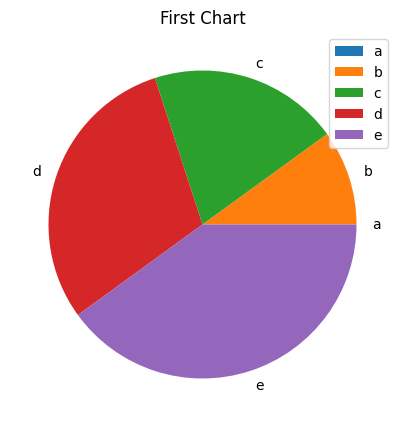

In [35]:
labels = ['a', 'b', 'c', 'd', 'e']
x = np.arange(5)

# Get the figure and axis objects and set figure size
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the data
ax.pie(x, labels=labels)

# Add additional information
ax.set_title('First Chart')
ax.legend()
plt.show() # Not strictly necessary in a notebook but good practice

## Question 8 - Bar Chart

The same idea as above applies for a [barchart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), the difference being there are now two dimensions of data.

i) Create a NumPy array with 5 labels of your choice called `x` and another NumPy array with 5 random integers between 10 and 50 called `y`

ii) Create a barchart using this data with a title and both axes given a label.


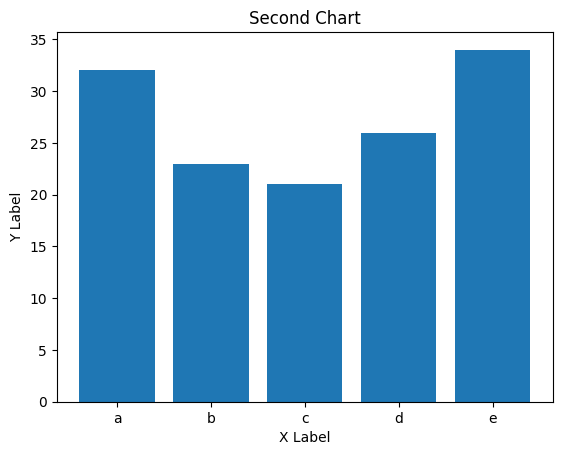

In [36]:
# Answer Here
x = ['a', 'b', 'c', 'd', 'e']
y = np.random.randint(10, 50, 5)

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('Second Chart')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()

## Question 9 - Plotting Functions

Often we want to plot functions in terms of x and y. Matplotlib doesn't understand variables in terms of pure mathematical notation so we need to supply it with values of x. For this we can use [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). This creates a set of numbers between a set start and end point with even spacing between each interval (linear space).

i) Create a linear space between 0 and 10 with 50 values called `x`

ii) Plot the function $\sin(x)$ on a new plot. `HINT:` There are handy NumPy functions for common mathematical functions.

ii) Plot the function $\sin(x) + \cos(x)$ on the same plot. Add a title and legend with the labels for each function.

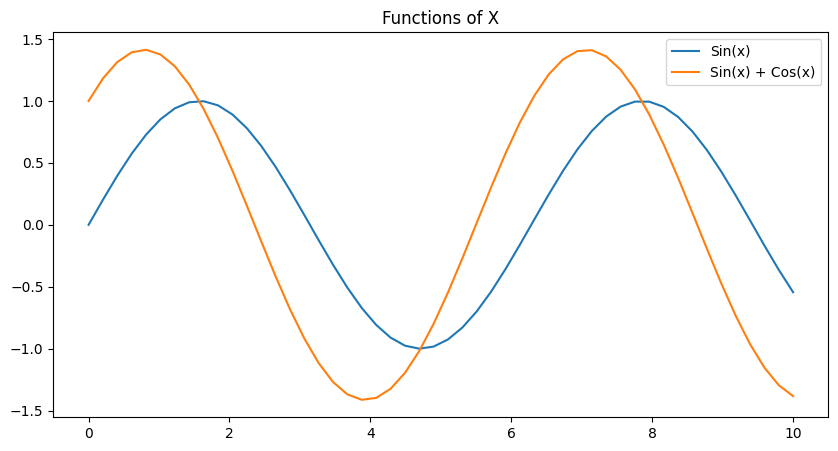

In [45]:
# Answer Here
x = np.linspace(0,10, 50)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, np.sin(x), label='Sin(x)')
ax.plot(x, np.sin(x) + np.cos(x), label='Sin(x) + Cos(x)')

ax.set_title('Functions of X')
ax.legend()